# Análise Exploratória e Pré-processamento

## Análise Exploratória

### Datasets

Os datasets serão armazenados no diretório data conforme a estrutura a seguir:

...

    ├── data                            <- Diretório de dados.
    │   ├── external                    <- Diretório de dados externos(temporário).
    │   │   └── input_video             <- Diretório para armazenar o vídeo recebido via 
    │   │                                  upload para classificação.
    │   │   
    │   ├── interim                     <- Diretório de dados em processamento (temporário).
    │   │   └── input_face              <- Diretório para armazenar os frames processados 
    │   │                                  do vídeo recebido via upload para classificação.
    │   │
    │   ├── processed                   <- Diretório de dados processados.
    │   │   ├── dataset_celebdf         <- Diretório de faces do dataset celebdf
    │   │   │   └── real_face           <- Diretório de faces reais
    │   │   │   └── fake_face           <- Diretório de faces falsas
    │   │   │
    │   │   ├── dataset_faceforensics   <- Diretório de faces do dataset faceforensics
    │   │   │   └── real_face           <- Diretório de faces reais
    │   │   │   └── fake_face           <- Diretório de faces falsas
    │   │   │
    │   │   └── dataset_dfdc            <- Diretório de faces do dataset dfdc
    │   │       └── real_face           <- Diretório de faces reais
    │   │       └── fake_face           <- Diretório de faces falsas
    │   │   
    │   └── raw                         <- Diretório de dados brutos.
    │       ├── dataset_celebdf         <- Diretório de vídeos do dataset celebdf
    │       │   └── real_video          <- Diretório de vídeos reais
    │       │   └── fake_video          <- Diretório de vídeos falsos
    │       │
    │       ├── dataset_faceforensics   <- Diretório de vídeos do dataset faceforensics
    │       │   └── real_video          <- Diretório de vídeos reais
    │       │   └── fake_video          <- Diretório de vídeos falsos
    │       │
    │       └── dataset_dfdc            <- Diretório de vídeos do dataset dfdc
    │           └── real_video          <- Diretório de vídeos reais
    │           └── fake_video          <- Diretório de vídeos falsos
...

In [3]:
# Importação de Bibliotecas:
from glob import glob
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [4]:
def display_img(video):
    cap = cv2.VideoCapture(video)  # take 1 picture
    ret, frame = cap.read()
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    ax.imshow(frame)

In [5]:
videos_reais = glob("../data/raw/dataset_celebdf/real_video/*.mp4")

In [6]:
videos_reais[0]

'../data/raw/dataset_celebdf/real_video/00001.mp4'

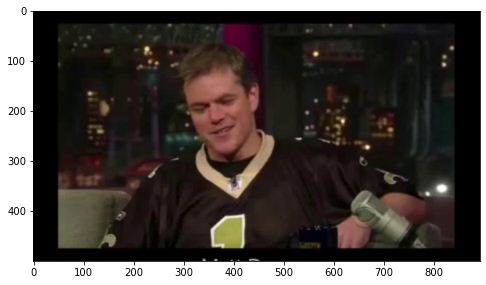

In [45]:
display_img(videos_reais[0])

In [56]:
cap = cv2.VideoCapture(videos_reais[0])
cap.get(cv2.CAP_PROP_FRAME_COUNT)

415.0

In [ ]:
import cv2
vidcap = cv2.VideoCapture(videos_reais[0])
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("..data/processed/dataset_celebdf/fake_video/"+"frame"+str(count)+".jpg",image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1


In [59]:
# Take some frames:
count = 0
cap = cv2.VideoCapture(videos_reais[0])
ret,frame = cap.read()
filepath = "..data/processed/dataset_celebdf/fake_video/"


while count < 3:
    cap.set(cv2.CAP_PROP_POS_MSEC,(count*1000))   
    ret,frame = cap.read()
    if count == 0:
        image0 = frame
    elif count == 1:
        image1 = frame
    elif count == 2:
        image2 = frame
    
    cv2.imwrite( filepath+ "frame%d.jpg" % count, image2)     # Next I will save frame as JPEG
    count = count + 1

def display(img):
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)


In [65]:
cv2.imwrite("teste.jpg",image2) 

True

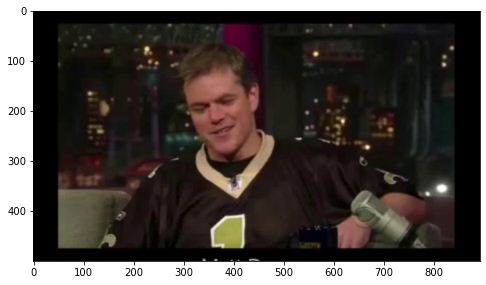

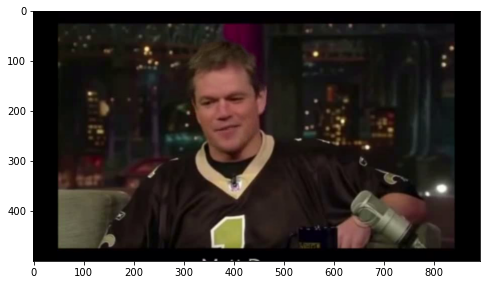

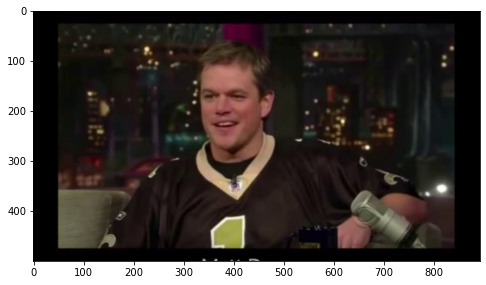

In [63]:
display(image0) 
display(image1) 
display(image2) 

In [37]:
'''
param: object_cascade_path - path for the *.xml defining the parameters for {face, eye, smile, profile}
detection algorithm
source of the haarcascade resource is: https://github.com/opencv/opencv/tree/master/data/haarcascades
'''
#You need to Download or add this file to your notebook, Check in the input files
face_cascade = cv2.CascadeClassifier('../src/features/haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (0,255,0), 2) 
        
    return face_img



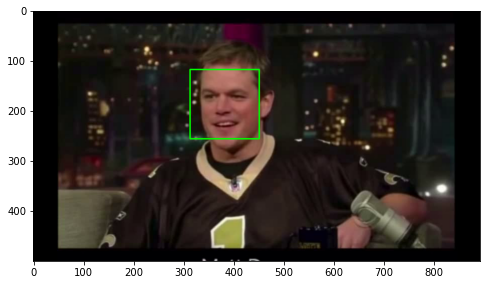

In [39]:
display(detect_face(image2))

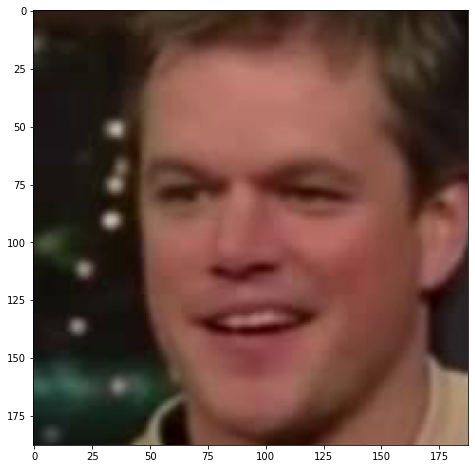

In [44]:
#ROI
def ROI(img):
    offset = 25 
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor=1.3, minNeighbors=5) 
    
    for (x,y,w,h) in face_rects: 
        roi = face_img[y-offset:y+h+offset,x-offset:x+w+offset] 
        
        
    return roi

image = ROI(image2)
display(image)

In [ ]:
videos_reais = glob("../data/raw/dataset_celebdf/real_video/*.mp4")

In [5]:
from IPython.display import HTML
from base64 import b64encode
import os

tipo = 'real_video'
pasta = 'Proj-Aplicado-XPE-MBA-Machine-Learning/data/raw/dataset_celebdf'

def play_video(video_file, subset=tipo):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(os.path.join(pasta, subset,video_file),'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

In [ ]:
play_video(fake_videos[0])

In [ ]:


df_train.label.value_counts().plot.bar()



In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

ModuleNotFoundError: No module named 'cv2'

In [7]:
videos_reais[0]

'../data/raw/dataset_celebdf/real_video/00001.mp4'

In [67]:
from IPython.display import HTML
from base64 import b64encode
import os

video_url = open('../data/raw/dataset_dfdc/id0_id1_0000.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

FileNotFoundError: [Errno 2] No such file or directory: '../data/raw/dataset_dfdc/id0_id1_0000.mp4'

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

tipo = 'real_video'
pasta = 'Proj-Aplicado-XPE-MBA-Machine-Learning/data/raw/dataset_celebdf'

def play_video(video_file, subset=tipo):
    '''
    Display video
    param: video_file - the name of the video file to display
    param: subset - the folder where the video file is located (can be TRAIN_SAMPLE_FOLDER or TEST_Folder)
    '''
    video_url = open(os.path.join(pasta, subset,video_file),'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(video_url).decode()
    return HTML("""<video width=500 controls><source src="%s" type="video/mp4"></video>""" % data_url)

### CELEB-DF:
Link:
- Celeb-DF: https://www.kaggle.com/datasets/reubensuju/celeb-df-v2

In [4]:
# Lista de vídeos:
videos_reais = glob("../data/raw/dataset_celebdf/real_video/*.mp4")
videos_fakes= glob("../data/raw/dataset_celebdf/fake_video/*.mp4")
# Totais:
total_reais = len(videos_reais)
print("Total de vídeos reais: ", total_reais)
total_fakes = len(videos_fakes)
print("Total de vídeos falsos: ", total_fakes)
print("Total de vídeos: ", total_reais + total_fakes)

Total de vídeos reais:  890
Total de vídeos falsos:  5639
Total de vídeos:  6529


Total de vídeos:  6529
Total de vídeos reais:  890
Total de vídeos falsos:  5639

Gráfico dos quantitativos:


<AxesSubplot:>

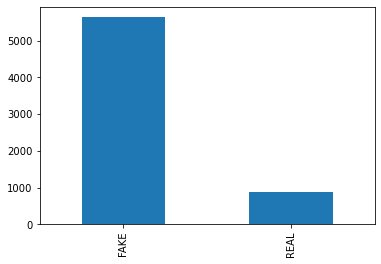

In [10]:
# Bibliotecas
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
# Funções para análise exploratória:
dataset = 'celebdf'
def explora(dataset):
    # Lista de vídeos:
    videos_reais = glob("../data/raw/dataset_"+ dataset +"/real_video/*.mp4")
    videos_fakes = glob("../data/raw/dataset_"+ dataset +"/fake_video/*.mp4")
    # Totais:
    total_reais = len(videos_reais)
    total_fakes = len(videos_fakes)
    print("Total de vídeos: ", total_reais + total_fakes)
    print("Total de vídeos reais: ", total_reais)
    print("Total de vídeos falsos: ", total_fakes)
    # Cria dataframe de identificação
    dataframe_videos_reais =  pd.DataFrame( data = {"video": videos_reais, "label" : "1", "descricao": "REAL"})
    dataframe_videos_fakes =  pd.DataFrame( data = {"video": videos_fakes, "label" : "0", "descricao": "FAKE"})
    dataframe_videos = pd.concat([dataframe_videos_reais, dataframe_videos_fakes])
    del dataframe_videos_reais, dataframe_videos_fakes
    dataframe_videos.to_csv("../data/raw/dataset_"+ dataset +"/metadados.csv",sep=";", index=False)
    # Plot gráfico
    print("\nGráfico dos quantitativos:")
    display(dataframe_videos['descricao'].value_counts().plot.bar())


explora(dataset)

In [2]:
glob("../data/raw/dataset_"+ dataset +"/real_video/*.mp4")

[]

In [ ]:
# Amostra reais:

In [8]:
# Amostra falsos:

***

### FaceForensics++:
Link:
- FaceForensics: https://www.kaggle.com/datasets/sorokin/faceforensics

In [6]:
total_real = glob("../data/raw/dataset_faceforensics/real_video/*.mp4")
print("Total de vídeos reais: ", len(total_real))
total_fake = glob("../data/raw/dataset_faceforensics/fake_video/*.mp4")
print("Total de vídeos falsos: ", len(total_fake))
print("Total de vídeos: ", len(total_real)+len(total_fake))

Total de vídeos reais:  1000
Total de vídeos falsos:  4000
Total de vídeos:  5000


***

### DFDC:
Link:
- DFDC: https://www.kaggle.com/competitions/deepfake-detection-challenge/data

In [7]:
total_real = glob("../data/raw/dataset_dfdc/real_video/*.mp4")
print("Total de vídeos reais: ", len(total_real))
total_fake = glob("../data/raw/dataset_dfdc/fake_video/*.mp4")
print("Total de vídeos falsos: ", len(total_fake))
print("Total de vídeos: ", len(total_real)+len(total_fake))

Total de vídeos reais:  0
Total de vídeos falsos:  0
Total de vídeos:  0


***
## Pré-processamento

Etapas:
- Capturar frames dos vídeos
- Detecção de Faces e região de interesse 
- Divisão treino-teste

In [ ]:
# Funções